In [9]:
import numpy as np
import json
import albumentations as A
import cv2
import math
from PIL import Image
from imgaug import augmenters as iaa
from torchvision.transforms import functional as F
from pathlib import Path

SEED = 42
cloud_transform = iaa.Sequential(
    [
        iaa.Clouds(seed=SEED),
    ]
)


IMG_SIZE = 10496

class RandomRotate(A.Rotate):
    def __init__(
        self,
        center_coords,
        limit=90,
        interpolation=cv2.INTER_LINEAR,
        border_mode=cv2.BORDER_REFLECT_101,
        value=None,
        mask_value=None,
        method="largest_box",
        crop_border=False,
        always_apply=False,
        p=0.5,
    ):
        super().__init__(
            limit, interpolation, border_mode, value, mask_value, method, crop_border, always_apply, p
        )
        self.center_coords = center_coords

        if method not in ["largest_box", "ellipse"]:
            raise ValueError(f"Rotation method {self.method} is not valid.")

    def apply_to_keypoint(
        self, keypoint, angle=0, x_min=None, x_max=None, y_min=None, y_max=None, cols=IMG_SIZE, rows=IMG_SIZE, **params
    ):
        matrix = cv2.getRotationMatrix2D(self.center_coords, angle, 1.0)
        x, y, a, s = keypoint[:4]
        x, y = cv2.transform(np.array([[[x, y]]]), matrix).squeeze()
        
        return x, y, a + math.radians(angle), s


Base angle: 7.571997418999672
Base angle: 214.30197715759277


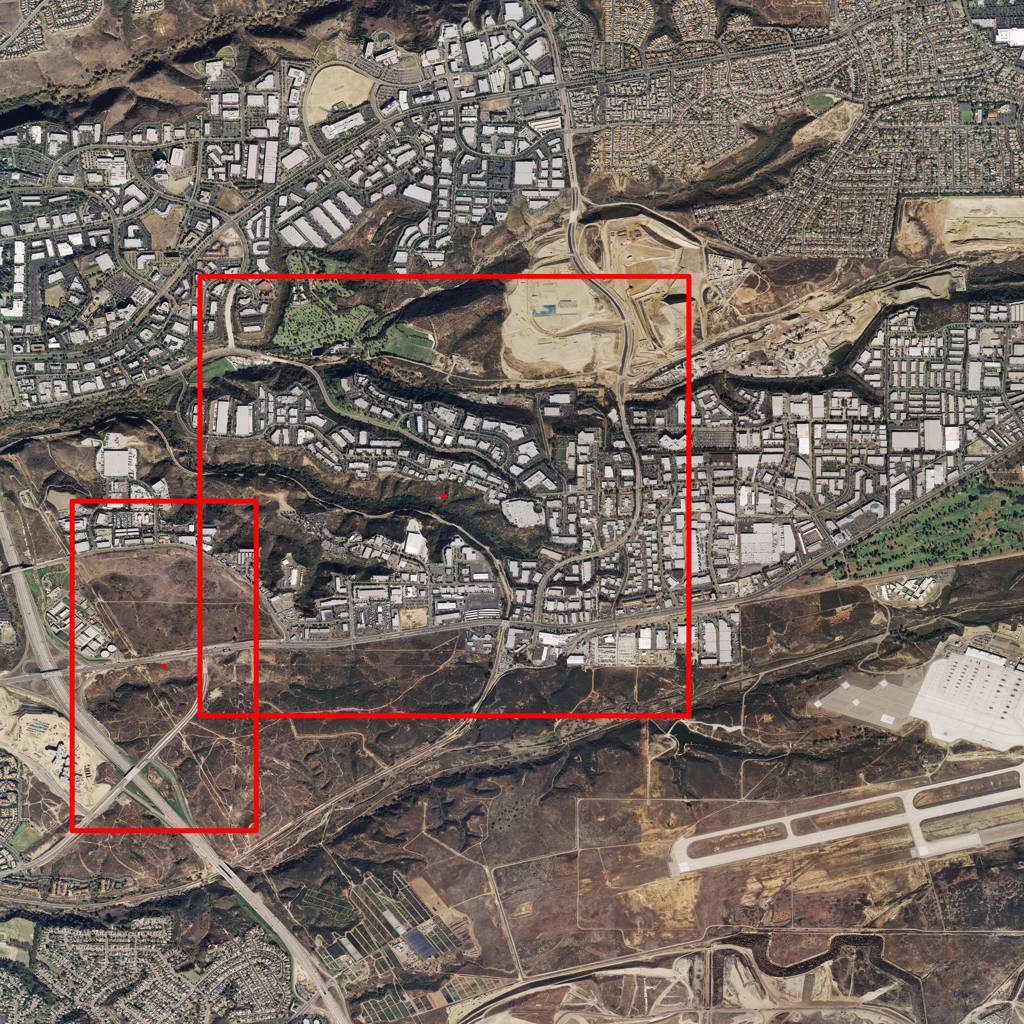

In [12]:
original_img = cv2.imread(str("../data/original.tiff"))[..., ::-1]
original_img = np.float32(original_img)

images_paths = list(Path("/home/and/projects/hacks/ai-areal-photo/data/test").iterdir())

for img_path in images_paths[:2]:
    img_id = img_path.name.split(".")[0]
    image = cv2.imread(str(img_path))[..., ::-1]
    with open(f"../data/agg_submit_regnets_v2/{img_id}.json", "r") as f:
        meta = json.load(f)
    keypoints = [
        coords + [meta["angle"]]
        for key, coords in meta.items() if key != "angle"
    ]

    # real points
    points = np.array([
        keypoints[0][:2],
        keypoints[1][:2],
        keypoints[3][:2],
        keypoints[2][:2],
    ], dtype=np.int32)
    angle = keypoints[0][2]
    cv2.polylines(original_img, [points], True, color=(255, 0, 0), thickness=50)
    center_coords = (points[:, 0].min() + points[:, 0].max()) // 2, (points[:, 1].min() + points[:, 1].max()) // 2
    cv2.circle(original_img, center_coords, 2, (255, 0, 0), thickness=50)
    print("Base angle:", angle)

    # # gen points
    # transform = A.Compose([
    #     RandomRotate(
    #         center_coords=np.float32(center_coords), 
    #         limit=360,
    #         p=1),
    # ], keypoint_params=A.KeypointParams(format='xya', angle_in_degrees=True, remove_invisible=False, check_each_transform=False))

    # transformed = transform(image=image, keypoints=keypoints)
    # points = np.array([
    #     transformed["keypoints"][0][:2],
    #     transformed["keypoints"][1][:2],
    #     transformed["keypoints"][3][:2],
    #     transformed["keypoints"][2][:2],
    # ])
    # angle = transformed["keypoints"][0][2]
    # # cv2.polylines(original_img, [points], True, color=(0, 255, 0), thickness=50)
    # t_center_coords = (points[:, 0].min() + points[:, 0].max()) // 2, (points[:, 1].min() + points[:, 1].max()) // 2
    # # cv2.circle(original_img, t_center_coords, 2, (0, 255, 0), thickness=50)
    # print("Transformed angle:", angle)


    # plot img
    # display(Image.fromarray(image).resize((224, 224)))
    # display(Image.fromarray(transformed["image"]).resize((224, 224)))
    # display(Image.fromarray(np.uint8(original_img)).resize((1024, 1024)))

display(Image.fromarray(np.uint8(original_img)).resize((1024, 1024)))


Base angle: 6.750338226556778
Base angle: 215.05645036697388


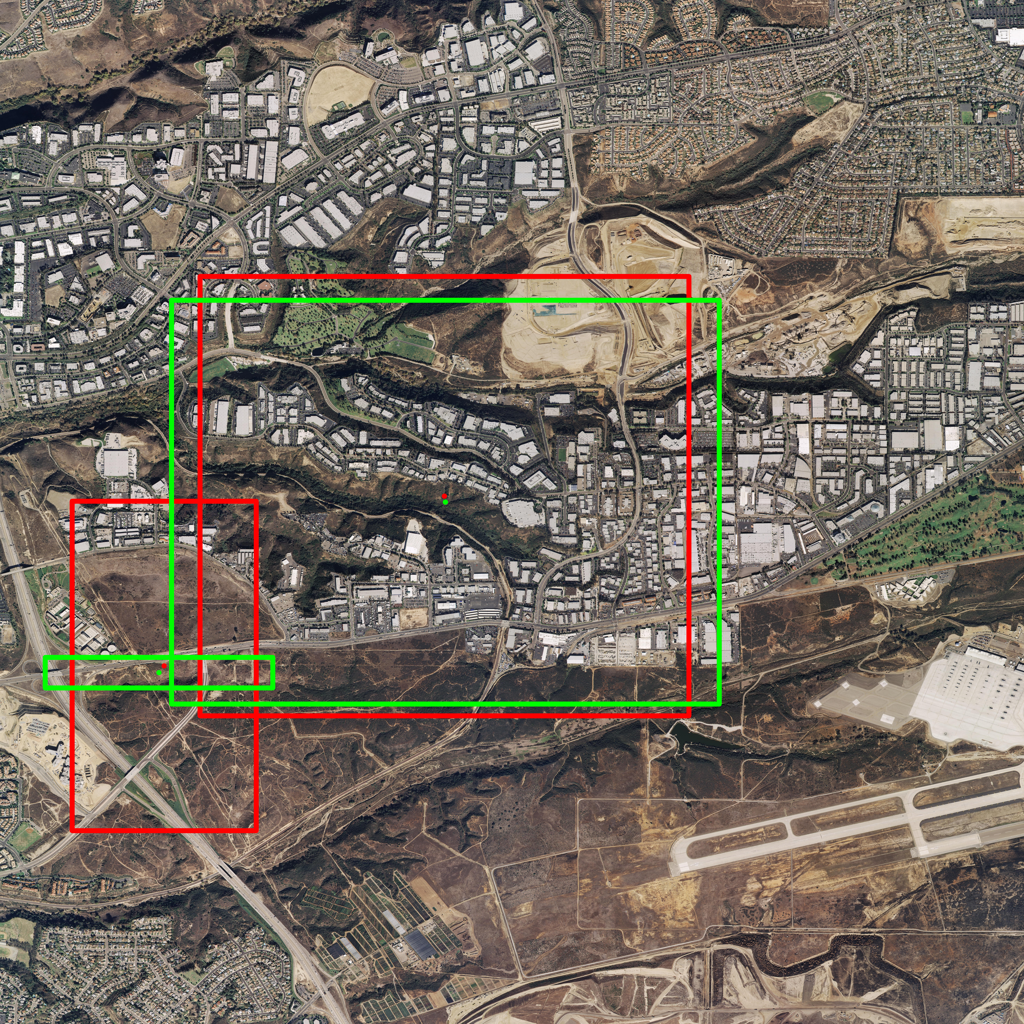

In [13]:
# original_img = cv2.imread(str("../data/original.tiff"))[..., ::-1]
# original_img = np.float32(original_img)

images_paths = list(Path("/home/and/projects/hacks/ai-areal-photo/data/test").iterdir())

for img_path in images_paths[:2]:
    img_id = img_path.name.split(".")[0]
    image = cv2.imread(str(img_path))[..., ::-1]
    with open(f"../data/agg_submit_regnets_v3/{img_id}.json", "r") as f:
        meta = json.load(f)
    keypoints = [
        coords + [meta["angle"]]
        for key, coords in meta.items() if key != "angle"
    ]

    # real points
    points = np.array([
        keypoints[0][:2],
        keypoints[1][:2],
        keypoints[3][:2],
        keypoints[2][:2],
    ], dtype=np.int32)
    angle = keypoints[0][2]
    cv2.polylines(original_img, [points], True, color=(0, 255, 0), thickness=50)
    center_coords = (points[:, 0].min() + points[:, 0].max()) // 2, (points[:, 1].min() + points[:, 1].max()) // 2
    cv2.circle(original_img, center_coords, 2, (0, 255, 0), thickness=50)
    print("Base angle:", angle)

display(Image.fromarray(np.uint8(original_img)).resize((1024, 1024)))
